# <span style="color: blue">Laboratorio 7: Prueba de Hipótesis I</span> <a class="tocSkip"> 

### <span style="color: green">Prof. Andrés Arguedas - XS-0300 - II 2020</span> <a class="tocSkip"> 

*Este laboratorio es parte del curso XS-0300 Estadística para Biología I de la Escuela de Estadística de la Universidad de Costa Rica, y se presenta con una licencia [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).*

**ATENCIÓN:** Antes de entregar este laboratorio, asegúrese que todo corre como se espera. Para hacer esto, primero **reinice el kernel**, esto lo puede hacer seleccionado **Kernel** en el menú y luego **Restart**. Habiendo reiniciado el kernel, **corra todas las celdas**, esto lo puede hacer seleccionando **Cell** en el menú y luego **Run All**.

Por último, recuerde rellenar cualquier lugar donde diga `ESCRIBA SU CÓDIGO AQUÍ` o "ESCRIBA SU RESPUESTA AQUI", así como escribir su nombre y carné a continuación:

In [1]:
NOMBRE = ""
CARNE = ""

---

## Preparación para este laboratorio
    
El presente laboratorio tiene como objetivos de aprendizaje:
    
1. Repasar los conceptos e interpretaciones del intervalo de confianza para un promedio
2. Aprender como realizar una prueba de hipótesis para un promedio utilizando 0
3. Conocer la relación entre los intervalos de confianza y las pruebas de hipotésis, además de la relación entre significancia y confianza

En este laboratorio utilizaremos el conjunto de datos de `aranas`, junto con los paquetes `ggplot2`, `readr` y `dplyr`. Ya todos estos paquetes están descargados y disponibles en el entorno virtual, al igual que el conjunto de datos, por lo que no es necesario que descarguen o consigan ningún paquete o conjunto de datos adicional, todos ya están disponibles.

---

## Preparación del conjunto de datos

En este laboratorio, vamos a utilizar el conjunto de datos `aranas`, el cual contiene observaciones en cuatro variables de 40 arañas distintas. Las variables presentes en el conjunto de datos son:

- `arana`: un número del 1 al 40, utilizado para identificar a cada una de las arañas
- `Tamano.arana`: el tamaño de la araña en cm
- `Tamano.tela`: el largo de la telaraña en cm
- `Altura`: la altura de la tela en cm
- `Inclinacion`: la inclicación de la tela en grados

Carguemos este conjunto de datos a R mediante el comando `read_csv()`:

In [2]:
library(readr)

aranas <- read_csv("data/aranas.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  arana = col_double(),
  Tamano.arana = col_double(),
  Tamano.tela = col_double(),
  Altura = col_double(),
  Inclinacion = col_double()
)




Dado que no hemos utilizado este conjunto de datos antes, vamos a empezar haciendo un summary para ver las variables que contiene y como fueron cargadas a R:

In [3]:
summary(aranas)

     arana        Tamano.arana     Tamano.tela        Altura      
 Min.   : 1.00   Min.   : 0.940   Min.   :12.00   Min.   : 33.00  
 1st Qu.:10.75   1st Qu.: 1.245   1st Qu.:16.56   1st Qu.: 47.75  
 Median :20.50   Median : 1.410   Median :18.12   Median : 75.00  
 Mean   :20.50   Mean   : 1.716   Mean   :18.96   Mean   : 87.38  
 3rd Qu.:30.25   3rd Qu.: 1.583   3rd Qu.:21.27   3rd Qu.:114.25  
 Max.   :40.00   Max.   :14.800   Max.   :28.50   Max.   :270.00  
  Inclinacion    
 Min.   : 40.00  
 1st Qu.: 65.00  
 Median : 80.00  
 Mean   : 73.88  
 3rd Qu.: 85.00  
 Max.   :100.00  

Como podemos ver, todas las variables fueron cargadas como numéricas, lo cual es el caso en todas ellas excepto para `arana` que, al ser simplemente un identificador, debería ser una variable de factor. Por lo tanto, vamos a empezar por cambiar esta variable a factor:

In [4]:
library(dplyr)
aranas <- aranas %>% mutate(arana = factor(arana))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Volvamos a hacer un `summary()` para verificar que todo funcionó de buena forma:

In [5]:
summary(aranas)

     arana     Tamano.arana     Tamano.tela        Altura      
 1      : 1   Min.   : 0.940   Min.   :12.00   Min.   : 33.00  
 2      : 1   1st Qu.: 1.245   1st Qu.:16.56   1st Qu.: 47.75  
 3      : 1   Median : 1.410   Median :18.12   Median : 75.00  
 4      : 1   Mean   : 1.716   Mean   :18.96   Mean   : 87.38  
 5      : 1   3rd Qu.: 1.583   3rd Qu.:21.27   3rd Qu.:114.25  
 6      : 1   Max.   :14.800   Max.   :28.50   Max.   :270.00  
 (Other):34                                                    
  Inclinacion    
 Min.   : 40.00  
 1st Qu.: 65.00  
 Median : 80.00  
 Mean   : 73.88  
 3rd Qu.: 85.00  
 Max.   :100.00  
                 

Como podemos ver, ahora `arana` si es factor y ya todas las variables están codificadas de forma correcta. Por lo tanto, podemos proceder con el resto de nuestro análisis para este laboratorio.

---

## Estadísticos descriptivos

En el caso de este laboratorio, solamente vamos a trabajar con la variable del tamaño de la araña (`Tamano.arana`), por lo que solamente estudiaremos esta variable y su distribución, pero si quiere también puede verificar el comportamiento de las demás variables numéricas de este conjunto de datos como práctica. Para empezar, carguemos el paquete `ggplot2` para poder utilizarlo para hacer gráficos:

In [6]:
library(ggplot2)

Habiendo cargado este paquete, podemos crear nuesto primer gráfico, un histograma del tamaño de las arañas:

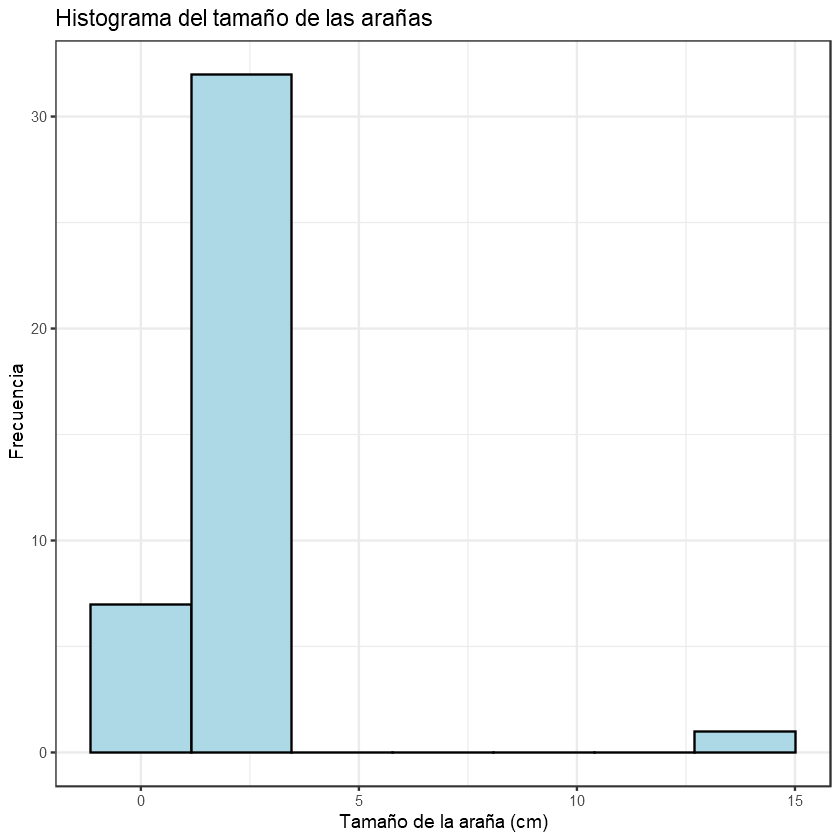

In [7]:
aranas %>% ggplot(aes(x = Tamano.arana)) +
    geom_histogram(bins = nclass.Sturges(aranas$Tamano.arana), fill = "lightblue", col = "black") +
    labs(title = "Histograma del tamaño de las arañas",
         x = "Tamaño de la araña (cm)",
         y = "Frecuencia") +
    theme_bw()

Tal vez lo más notable de este histograma es que hay un valor muy grande comparado con los demás. En este caso, podemos ver que casi todas las arañas miden menos de 5 cm, pero hay un araña que mide cerca de 15 cm, considerablemente más que las demás. Si quieremos, también podemos hacer un gráfico de cajas para ver estos datos de otra forma similar:

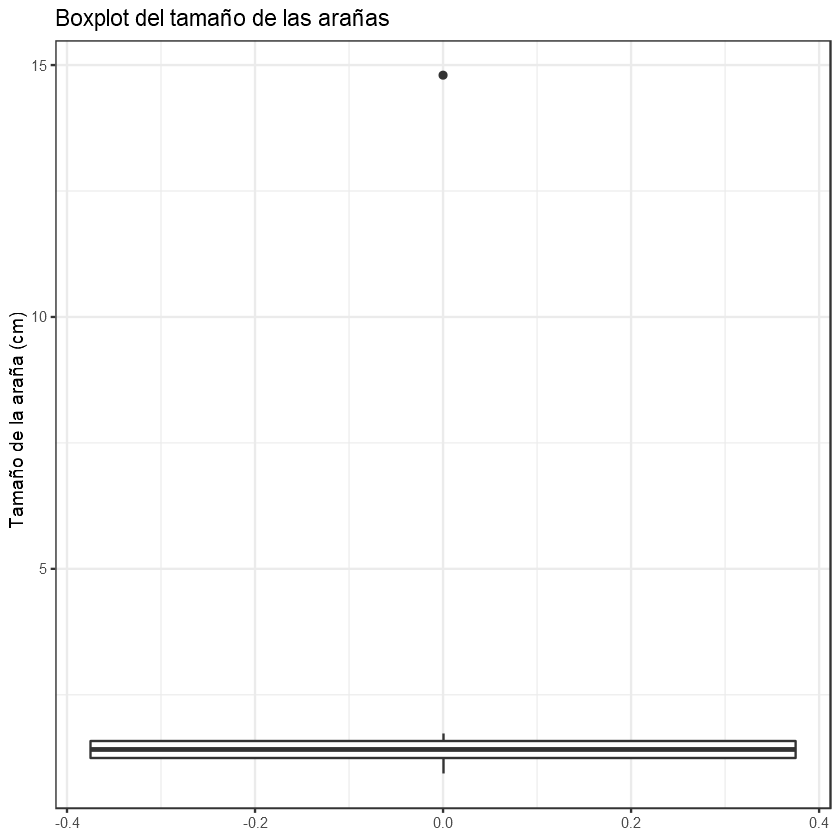

In [8]:
aranas %>% ggplot(aes(y = Tamano.arana)) +
    geom_boxplot() +
    labs(title = "Boxplot del tamaño de las arañas",
         y = "Tamaño de la araña (cm)") +
    theme_bw()

Nuevamente, todos las arañas, menos la que mide cerca de 15 cm, tienen un tamaño menor a 2,5 cm. Por lo anterior, es bastante claro que ese dato es un valor extremo, por lo que necesitamos tomar una decisión: mantener este dato o eliminarlo. Dado que no recolectamos los datos, no podemos saber si este dato corresponde a una observación real, o si simplemente fue un dedazo al momento de incluir la altura. Además, dado que no tenemos otras variables auxiliares, como la especie o el sexo de la araña, tampoco podemos deducir si realmente esa diferencia es real o no. Por lo tanto, durante los demás ejemplos que haremos durante este laboratorio, no vamos a eliminar este valor extremo. Aun así, en el ejercicio para este laboratorio, el objetivo es replicar los análisis que realizaremos a continuación, pero eliminando ese valor extremo, para ver si las conclusiones cambian o no. Habiendo analizado la variable de interés de forma descriptiva, podemos proceder a realizar las pruebas de hipótesis.

---

## Prueba de hipótesis para un promedio

Para empezar, recordemos que siempre necesitamos plantear una hipótesis nula ($H_0$) y una hipótesis alterna ($H_1$). En el caso de la prueba de hipótesis para un promedio, podemos especificar las siguientes hipótesis:

$$
H_0 : \mu = \mu_0 \qquad H_1 : \mu \neq \mu_0
$$

donde $\mu_0$ es un valor de interés para el promedio de la variable. Para poder hacer las pruebas de hipótesis, primero ocupamos especificar valores de interés para cada variable. En este caso, supongamos que un estudio anterior sobre la misma especie de arañas observó que el tamaño de las arañas en esa muestra era cercana a 2 cm, por lo que, en nuestro caso, queremos ver si las arañas que nosotros recolectamos tienen la misma altura que las del artículo. Por lo tanto, podríamos definir $\mu_0 = 2$ y escribir estas hipótesis como:

$$
H_0 : \mu = 2 \qquad H_1 : \mu \neq 2
$$

Tomando estas hipótesis, al hacer la prueba necesitamos tomar una decisión con base en los datos de la muestra: rechazar o no rechazar la hipótesis nula. En el caso de no rechazar la hipótesis nula, estamos diciendo que la muestra apoya la hipótesis nula, mientras que si la rechazamos, estamos diciendo que los datos de la muestra apoyan alguna otra hipótesis, aunque no sabemos específicamente cual. Además, dado que tenemos que tomar una decisión sobre rechazar o no la hipótesis nula, y dado que no conocemos la realidad, podemos incurrir en error tipo I u error tipo II. El error tipo I se da cuando rechazamos una hipótesis verdadera, mientras que el error tipo II se da al no rechazar una hipótesis falsa. Aunque no podemos saber si estamos cometiendo alguno de estos errores, dado que no conocemos las condiciones reales en la población, si podemos fijar una probabilidad máxima de cometer error tipo I, el cual denominamos como significancia, o $\alpha$. Usualmente, el valor de $\alpha$ se fija en un 5%, aunque esto es meramente histórico y por tradición, no tiene ninguna base científica y, por lo tanto, puede ser cambiado sin problemas. Lo más importante, ante nada, es establecer este valor de significancia antes de empezar cualquier análisis, dado que, si definimos la signficancia después de haber hecho nuestro análisis, estaríamos falseando los resultados. Por lo tanto, antes de empezar, vamos a definir el valor de la significancia a utilizar en este laboratorio como un 5%. Ahora sí, utilizando el comando `t.test()` podemos hacer el cálculo de la prueba de hipótesis, al igual que como lo usamos para obtener el intervalo de confianza:

In [9]:
t.test(aranas$Tamano.arana)


	One Sample t-test

data:  aranas$Tamano.arana
t = 5.0868, df = 39, p-value = 9.519e-06
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.033662 2.398338
sample estimates:
mean of x 
    1.716 


Veamos que la primera línea del resultado nos dice:

```
One Sample t-test
```

que quiere decir que R está haciendo una prueba de hipótesis para una sola muestra. Además, las últimas líneas:

```
95 percent confidence interval:
 1.033662 2.398338
sample estimates:
mean of x 
    1.716 
```

ya las analizamos en laboratorios anteriores. Mediante estos, podemos decir que el promedio muestral es de 1.716 y, con un 95% de confianza, el tamaño promedio de las arañas en la población está entre 1.0337 cm y 2.3983 cm. Solamente con el resultado de este intervalo de confianza podemos concluir sobre la hipótesis nula. ¿De qué forma? La hipótesis que queremos corroborar es si el tamaño promedio de las arañas en la población es igual, o distinta, a 2cm. En este caso, dado que el intervalo de confianza contiene al 2, entonces no podemos concluir que el promedio es distinto de 2 cm, dado que cabe la posibilidad real que este valor si sea igual a 2, ya que está incluido en el intervalo de confianza. Por lo tanto, con base en el intervalo de confianza, podemos decir que, con una significancia del 5%, no tenemos suficiente evidencia para rechazar la hipótesis nula que el tamaño promedio de las arañas en la población es igual a 2 cm. En otras palabras, no podemos concluir que el tamaño promedio sea distinto a 2 cm, ya sea porque no es distinto de 2 cm, o porque no tenemos suficientes datos para ver que es distinto (aunque esto es otro tema). Por último, recordemos que, dado que la significancia es el complemento de la confianza, entonces un intervalo de confianza del 95% debería llegar a las mismas conclusiones que usar una signficancia del 5%.

Por lo tanto, ya tenemos una conclusión con base en el intervalo de confianza, así que vamos a concluir con base en el valor de p, o p-value, que fue la otra forma en que vimos cómo hacer prueba de hipótesis. Lo que necesitamos para tomar una decisión está presente en los resultados del comando, de forma específica en las siguientes líneas:

```
t = 5.0868, df = 39, p-value = 9.519e-06
alternative hypothesis: true mean is not equal to 0
```

Aquí la primera línea nos devuelve el p-value, mientras que la segunda línea nos indica la hipótesis alterna que estamos especificando. Recordemos que el p-value es, simplemente, la probabilidad de encontrar un valor más extremo en otra muestra, es decir, si otra persona recolectara datos de la misma especie de arañas, bajo las mismas condiciones, y midiera su tamaño, bajo la hipótesis nula, la probabilidad de encontrar un promedio más extremo que el obtenido en nuestra muestra sería el p-value. Ahora, antes de interpretar, es importante resaltar que la hipótesis que estamos utilizando es incorrecta. ¿Por qué? Noten que el resultado dice **true mean is not equal to 0**, es decir, estamos utilizando las siguientes hipótesis:

$$
H_0 : \mu = 0 \qquad H_1 : \mu \neq 0
$$

que no es lo que queríamos probar. Esto sucede ya que R, por default, siempre utiliza estas hipótesis, pero podemos cambiar el valor a utilizar mediante el argumento `mu`, especificando el promedio de interés, como se muestra a continuación:

In [10]:
t.test(aranas$Tamano.arana, mu = 2)


	One Sample t-test

data:  aranas$Tamano.arana
t = -0.84188, df = 39, p-value = 0.405
alternative hypothesis: true mean is not equal to 2
95 percent confidence interval:
 1.033662 2.398338
sample estimates:
mean of x 
    1.716 


En este caso, cabe resaltar que la última parte del resultado que cambió es:

```
t = -0.84188, df = 39, p-value = 0.405
alternative hypothesis: true mean is not equal to 2
```

donde ahora la hipótesis alterna si dice que el promedio es distinto que 2 y, por lo tanto, el p-value cambió. Recordemos que el intervalo de confianza no depende del valor de la hipótesis nula, sino simplemente de las estimaciones de la muestra, por lo que este valor no cambia en el resultado cuando utilizamos valores distintos para `mu`. Ahora, en términos de interpretación, el valor de t obtenido fue de -0.84, es decir, el promedio de nuestra muestra está a 0.84 desviaciones estándar del valor de interés (2). Además de esto, el p-value es 0405, es decir, la probabilidad de que otra persona obtenga una muestra bajo condiciones similares y que encuentre un tamaño promedio de las arañas más extremo que el encontrado en nuestra muestra (es decir, a más de 0.84 desviaciones estándar) es de 0.405. Por lo tanto, si decidimos rechazar la hipótesis nula, en el peor de los casos, estaríamos rechazando un 40,5% de las veces y, asumiendo que $H_0$ es cierta, estaríamos cometiendo error tipo I, como máximo, en un 40,5% de las veces. Esto es una probabilidad bastante grande y, tomando en cuenta que fijamos el nivel de significancia (la probabilidad máxima de cometer error tipo I) en un 5%, entonces rechazar en este caso es inaceptable, dado que podríamos estar cometiendo error tipo I mucho más frecuentemente de lo que queremos. Por lo tanto, dado que el p-value es mayor que la significancia, no podemos rechazar la hipótesis nula que el tamaño promedio de las arañas en la población es de 2 cm. En otras palabras, al igual que concluimos con base en el intervalo de confianza, es posible que realmente el tamaño promedio de las arañas no sea igual a 2 cm, o simplemente no tenemos suficientes datos como para llegar a ver esa diferencia.

Lo más importante de este ejercicio es entender que, aunque las reglas de decisión son muy sencillas y aplican para cualquier prueba de hipótesis, el razonamiento de fondo y lo que tenemos que tomar en cuenta sobre la forma en la cual se recolectaron los datos, son igual de importantes. En otras palabras, es tan importante hacer un buen diseño para la recolección, procesamiento y análisis de datos dentro de una investigación, como lo es utilizar los procedimientos y pruebas de hipótesis apropiados, además de llegar a conclusiones correctas.

---

## Ejercicio (6 pts.)

Como notamos en el histograma de la variable de `Tamano.arana`, hay una observación que está muy alejada del resto de las observaciones, es decir, una araña que mide mucho más que las demás (cerca de 15 cm). Por lo tanto, como ejercicio vamos a replicar los análisis del laboratorio, pero ahora eliminando ese valor extremo.

1) Elimine el valor extremo del conjunto de datos y guárdelo con el nombre de `arana1`. *Sugerencia: Utilice el comando `filter()` de `dplyr`* (1 pt.)

2) Cree un boxplot para la variable `Tamano.arana` con base en el conjunto de datos `arana1`. ¿Cómo se ve ahora la distribución de esta variable? (2 pts.)

3) Vuelva a realizar la prueba de hipótesis que el promedio poblacional es igual a 2 cm, pero ahora utilizando `aranas1`. Concluya con base en el intervalo de confianza y el valor de p. ¿Cambia la conclusión a la que llegamos cuándo eliminamos el valor extremo? (3 pts.)

---

## <span style="color: blue">Entrega del laboratorio</span> <a class="tocSkip"> 

Para hacer entrega de este laboratorio, debe descargarlo presionando en **File**, luego **Download as** y, por último, **Notebook (.ipynb)**, en el menú superior, debajo del logo de Jupyter. También puede descargarlo directamente desde el botón de **Download** en la barra con íconos para acceso rápido.

Luego de haber localizado el archivo descargado, debe cambiar el nombre del archivo descargado por su número de carné, de forma que, si su carné es **B12345**, su archivo debería llamarse `B12345.ipynb`. Una vez le haya cambiado el nombre al archivo, lo puede subir a Mediación Virtual, en el apartado correspondiente a este laboratorio.

<a href="https://creativecommons.org/licenses/by-sa/4.0/">
    <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png" width="88" height="31" />
</a>